In [ ]:
import numpy as np
import math as mt
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from decimal import Decimal
from scipy import misc,special
import random as rd
import warnings
import sympy as sl

PREPARACION PARA EL 2 PARCIAL DE METODOS

1. Derivadas.
En el metodo Smoothed-particle hydrodynamics (SPH) se emplean diferentes kernel de aproximación para calcular las propiedades de un fluído en cada punto del espacio. Uno de ellos es el Kernel de Lucy detallado a continuación:

Lucy's Quartic Kernel
$$
W(R, h)= \alpha_D \left\{
  \begin{matrix} \left(1+3q)(1- q)^3\right) &  0\leq q \leq h  \\ 
  0 & in\ the\ other\ case.
  \end{matrix}
\right.
$$
donde,

$$
q=\frac{|(\vec{r}-\vec{r}')|}{h}
$$
y $\alpha_D$ es la constante de normalización:

en 2 dimensiones, viene dada por:$$
\alpha_D = \frac{5}{\pi h^2}
$$

en 3 dimensiones, viene dada por:$$
\alpha_D = \frac{105}{16\pi h^3}
$$

Para el kernel de Lucy en 2D encontrar su derivada a través de los siguientes pasos:

1. Realizar un gráfico del kernel de Lucy. \\
2. Encontrar la derivada empleanda la libreria simbolica \\
3. Realizar un grafico de los cálculos encontrados con la libreria simbólica y comparar con la derivada numérica de los datos del punto 1. \\

Recuerde siempre comparar sus resultados con sus cálculos realizados en papel y lapiz.

Opcional.

Resolver el problema en 3D

In [ ]:
#Referenecias:
#https://ephyslab.uvigo.es/wp-content/uploads/2019/04/1_ACT_Anxo_2012_OK.pdf
#https://ephyslab.uvigo.es/wp-content/uploads/2019/04/TFG_Sara_Ferreiro.pdf
#Usar sympy 
#r vector de posicion
# W funcion de peso o kernel  W_ab=W(r_a-r_b,h)
# h es la distancia de interacción llamada distancia de suavizado que controla el dominio de Ω
# R = r - r´, claro esta con la flecha arriba de vectores

def vectores(n, h): # Crear los puntos aleatoriamente, y por tanto, los vectores aleatoriamente
  lista_vectores = [[h, h]] # usamos el centro como referencia, para restar los vectores
  for i in range(n):
    r = np.array([rd.randint(0, 2*h),rd.randint(0, 2*h)]) # creamos un vector aleatoriamente
    lista_vectores.append(r)
  return np.array(lista_vectores) # devolvemos un array con todos los vectores creados

def q(x): # recibimos todos los vectores, y creamos a q, por definicion
  lista_q = []
  for i in range(1, len(x)):
    q = (np.linalg.norm(x[0] - x[i])) / h # con p.linalg.norm hacemos la maginutd de un vector 
    lista_q.append(q)
  return np.array(lista_q) # devolvemos un array con todos los valores de q obtenidos 

def w(x, h): # La funcion W(R,h)
  lista_w = []
  for i in range(len(x)):
    if (0 <= x[i]) and (x[i] <= 1): # filtro para ver que q si cumpla laas condiciones
      z = (1 + (3 * x[i])) * (1 - (x[i]))**3
      lista_w.append(z)
    else:
      z = 0
      lista_w.append(z)
  return np.array(lista_w) # devolvemos un arraray con todos los valores de la funcion W(q)

def f(x):
  return (1 + (3 * x)) * (1 - x)**3 # la funcion W, para derivar  

#Vamos a generar un radio de 2h con h = 30
h = 30 # radio donde deben estar las particulas
n = 1000 # numero de vectores que se generaran aleatoriamente
alpha_2d = (5) / (np.pi * (h)**2 ) # constante normalizadora que vale 0.015915494309189534

vectores_r = vectores(n, h) # es una matriz, cada fila es un vector, estos vectores son aleatorios 
los_q = q(vectores_r) # array con los valores de q 
los_w = w(los_q, h) #array con los valores de la funcion W(q)

#Derivada hecha con scipy, es el mismo resultado que con scipy
derivar = np.vectorize(misc.derivative) # vectorizamos la funcion derivar
derivada = derivar(f, los_q, dx = 1e-6) # derivada es la funcion W´(q)

#Derivada hecha con sympy, es el mismo resultado que con scipy 
m = sl.Symbol('m') # creamos la variable m 
mostrar = diff((1 + (3 * m)) * (1 - m)**3) # 
dm = sl.lambdify(m, mostrar, "numpy") #la funcion -12*(-1 + m)**2*m, es la funcion f derivada a mano 
print(mostrar)

3*(1 - m)**3 - 3*(1 - m)**2*(3*m + 1)


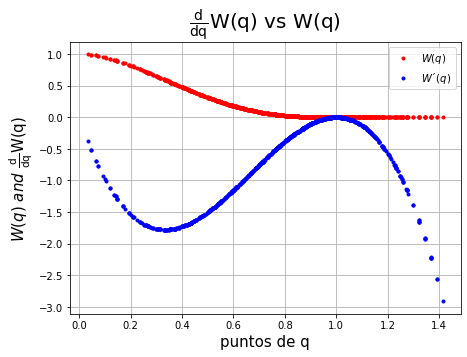

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(los_q, w(los_q, h), "r.", label = "$W(q)$")
plt.plot(los_q, dm(los_q), "b.", label = "$W´(q)$") #dm(los_q) se puede cambiar por el metodo hecho con scipy, la variable derivada, y funciona igualmente
plt.title(r'$\frac{\rmd}{\rm dq}W(q) \ vs \ W(q)$', size = 20)
plt.xlabel("puntos de q", size = 15)
plt.ylabel(r'$W(q) \ and \ \frac{\rm d}{\rm dq}W(q) $', size = 15)
plt.legend()
plt.grid()


In [ ]:
def max_value(f_, a, b): # Funcion utilizada para hallar el valor maximo de una funcion
    x = sp.symbols("x") 
    x_ = np.linspace(a, b, 100)
    fk = sp.lambdify(x, f_, 'numpy') #Volver la funcion de Sympy a numpy
    fk_x = fk(x_) # Si es solo un valor devuelve el mismo
    if isinstance(fk_x,int):
      return [0,fk_x]
    return max(list(map(abs, fk_x))) # Si es una lista, devuelve el maximo

In [ ]:
import sympy as sp
import scipy as sc

#Regla del trapezoide
###Sea
\begin{equation}
x_0 = a \\
x_1 = b \\
h = b-a 
\end{equation}
###Usando el polinomio de Lagrange de grado 1
\begin{equation}
P_1(x)= \frac{(x-x_1)}{(x_0-x_1)}f(x_0)+\frac{(x-x_1)}{(x_1-x_0)}f(x_1)
\end{equation}
###La integral queda de la forma
\begin{equation}
\int_{a}^{b}f(x) = \int_{x_0}^{x_1} \left[ \frac{(x-x_1)}{(x_0-x_1)}f(x_0)+\frac{(x-x_0)}{(x_1-x_0)}f(x_1) \right]dx\\
+\frac{1}{2} \int_{x_0}^{x_1}f''(\xi(x))(x-x_0)(x-x_1)dx
\end{equation}
###siendo el error asociado
\begin{equation}
\frac{1}{2} \int_{x_0}^{x_1}f''(\xi(x))(x-x_0)(x-x_1)dx
\end{equation}

###Usando el teorema de  valor medio ponderado para integrales 
###Si $g$ es continua en $[a,b]$ y $g$ no cambia de signo en $[a,b]$ entonces existe un numero $c$ en $(a,b)$ tal que 
\begin{equation}
 \int_{a}^{b}f(x)g(x)dx=f(c)\int_{a}^{b}f(g)dx
\end{equation}


###Como $(x-x_0)(x-x_1)$ no cambia de signo en el intervalo $[x_0,x_1]$, entonces
\begin{align}
\int_{x_0}^{x_1}f''(\xi(x))(x-x_0)(x-x_1)dx = &f''(\xi)\int_{x_0}^{x_1}(x-x_0)(x-x_1)dx\\
=&f''(\xi) \left[\frac{x^3}{3}-\frac{(x_1+x_0)}{2}x^2+x_0x_1x  \right]_{x_0}^{x_1}\\
=&-\frac{h^3}{6}f''(\xi)
\end{align}
 
###Insertando esto en la ecuacion, y resolviendo la integral

\begin{align}
\int_{a}^{b}f(x) =& \left[ \frac{(x-x_1)^2}{2(x_0-x_1)}f(x_0)+\frac{(x-x_0)^2}{2(x_1-x_0)}f(x_1) \right]_{x_0}^{x_1}-\frac{h^3}{12}f''(\xi)\\
=&\frac{(x_1-x_0)}{2}[f(x_0)+f(x_1)]-\frac{h^3}{12}f''(\xi)
\end{align}

###Finalmente la regla del trapezoide queda definida por 
\begin{equation}
\int_{a}^{b}f(x)dx = \frac{h}{2}[f(x_0)+f(x_1)]-\frac{h^3}{12}f''(\xi)
\end{equation}

###Importante aclarar que la regla del trapezoide tiene un error asociado de $f''$ por lo que da exacto cuando la segunda derivada de la funcion es cero, como ocurre con los polinomios de grado uno 

In [ ]:
def trapz(f, a, b): # Funcion para la regla del trapezoide normal
  
  h = b-a
  f_0 = f(a)
  f_1 = f(b)
  x = sp.symbols("x")
  f2 = sp.diff(f(x),x,2)  # Hallar la segunda derivada para calcular el error
  val = max_value(f2,a,b) 
  max_val = val[1] if isinstance(val,list) else val  # El maximo valor de la derivada
  integral = (h/2)*(f_0+f_1)-max_value(f2,a,b)*((h**3)/12) # Calculo de la integral
  return integral

#Regla del trapezoide compuesto
###Si queremos hallar la integral de $f$ desde $a$ hasta $b$, se pueden realizar sucesivas integrales con el metodo del trapecio para intervalos igualmente espacios con nodos $\{x_0,x_1,x_2,...,x_n\}$  siendo $n$ intervalos espaciados por $h = \frac{(b-a)}{n}$

###Para cada par $[x_{j-1},x_j]$ se aplica el metodo del trapecio, con $x_j = a+jh$

\begin{align}
\int_{a}^{b}f(x)dx = &\left|\frac{h}{2}[f(x_0)+f(x_1)] -\frac{h^3}{12}f''(\xi)\right|+\left|\frac{h}{2}[f(x_1)+f(x_2)] -\frac{h^3}{12}f''(\xi)\right|+ ... +&\left|\frac{h}{2}[f(x_{n-1})+f(x_n)]-\frac{h^3}{12}f''(\xi)\right| \\
=&\frac{h}{2}\left| f(a) +\sum_{j=1}^{n-1}+f(b)\right|-\frac{h^3}{12}\sum_{j=1}^{n}f''(\xi_j)
\end{align}
###El teorema del valor medio implica que
\begin{align}
\min_{x\in[a,b]}f''(x) \leq f''(\xi_j) \leq \max_{x\in[a,b]}f''(x) \\
n\min_{x\in[a,b]}f''(x) \leq \sum_{j=i}^{n}f''(\xi_j) \leq n\max_{x\in[a,b]}f''(x) \\
\min_{x\in[a,b]}f''(x) \leq \frac{1}{n}\sum_{j=i}^{n}f''(\xi_j) \leq\max_{x\in[a,b]}f''(x)
\end{align}
###Por el teorema del valor medio, existe un $u\in[a,b]$ tal que
\begin{equation}
f^{(4)}(\mu) = \frac{1}{n}\sum_{j=i}^{n}f''(\xi_j) 
\end{equation}
###Remplazando en la ecuación
\begin{equation}
-\frac{h^3}{12}\sum_{j=1}^{n}f''(\xi_j) = -\frac{h^3}{12}nf^{(4)}(\mu) \\
\text{Como $h =\frac{b-a}{n}$} \\
-\frac{h^3}{12}nf^{(4)}(\mu) = \frac{b-a}{12}h^2f''(\mu)
\end{equation}
###La Regla del Trapezoide Compuesta es
\begin{equation}
\int_{a}^{b}f(x)=\frac{h}{2}\left[ f(a) +\sum_{j=1}^{n-1}f(x_j)+f(b)\right]-\frac{b-a}{12}h^2f''(\mu)
\end{equation}


#Calculo del error en la regla del trapezoide compuesto
###El error de la regla esta dado por el valor 
\begin{equation}
\frac{b-a}{12}h^2f''(\mu) < \epsilon
\end{equation}
###Donde $\epsilon$ es el maximo error que se quiere tener, teniendo en cuenta que $h = \frac{b-a}{n}$
\begin{equation}
\frac{b-a}{12}h^2f''(\mu) = \frac{(b-a)^3}{12n^2}f''(\mu) < \epsilon \\
(b-a)\sqrt{\frac{(b-a)}{12\epsilon}f''(\mu)} = n \\
\end{equation}
###Tomando a $f''(\mu)$ como el maximo valor de $f''(x)$, $x\in[a,b]$.
###El valor $\lceil n \rceil$ es el numero de intervalos que se deben usar en la regla del trapezoide compuesto (sin el termino del error), para obtener un valor igual a $\int_{a}^{b}f(x)$ con un error $\epsilon$

In [ ]:
def trapz_c(f,a,b,eps,n=0):

  def intervals(f2,a,b,eps):
    b_a = b-a  # Definiendo la diferencia de los limites
    val = max_value(f2,a,b)
    f2_u = val[1] if isinstance(val, list) else val # Valor maximo
    n = (b_a)*np.sqrt((b_a*f2_u)/(12*eps)) # Hallando el numero de intervalos 
    return int(np.ceil(n))
  T0= f(a)
  T1 = f(b)
  x = sp.symbols("x")
  f2 = sp.diff(f(x),x,2) 
  if n==0: # Si no se da una cantidad especifica de intervalos, hallarlos segun 
            #El error dado
    n = intervals(f2, a, b, eps)
  h = (b-a)/n
  x_ = np.linspace(a,b,n+1)
  f = np.vectorize(f)
  Tj = sum(f(x_[1:-1])) #Calcular la sumatoria de los x_j 
  return float((h/2)*(T0+2*Tj+T1)) # Valor de la integral

#Regla Simpson
###La regla simpson parte de un punto muy similar a la regla del trapecio
\begin{equation}
x_0 = a \\
x_1 = b \\
h = \frac{b-a}{2}
\end{equation}
###Y se usa el polinomio de Lagrange de grado 2
\begin{equation}
P_2(x)= \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0)+\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1)+\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2)
\end{equation}

###La integral queda de la forma
\begin{align}
\int_{a}^{b}f(x)dx= &\int_{x_0}^{x_2}\left[\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0)+\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1)+
\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2)\right]dx\\
+&\int_{x_0}^{x_2}\frac{(x-x_0)(x-x_1)(x-x_2)}{6}f^{(3)}(\xi(x))dx
\end{align}
###Donde el error asociado es
\begin{equation}
\int_{x_0}^{x_2}\frac{(x-x_0)(x-x_1)(x-x_2)}{6}f^{(3)}(\xi(x))dx
\end{equation}
###Usando el polinomios de Taylor de grado 3 para $f$ sobre x$_1$
\begin{equation}
f(x) = f(x_1)+f'(x_1)(x-x_1)+\frac{f''(x_1)}{2}(x-x_1)^2+\frac{f'''(x_1)}{6}(x-x_1)^3+\frac{f^{(4)}(\xi(x))}{24}(x-x_1)^4
\end{equation}
###De este modo la integral queda
\begin{align}
\int_{a}^{b}f(x)dx= &\left[f(x_1)(x-x_1)+\frac{f'(x_1)}{2}(x-x_1)^2+\frac{f''(x_1)}{6}(x-x_1)^3+\frac{f'''(x_1)}{24}(x-x_1)^4\right]_{x_0}^{x_2} \\
+&\frac{1}{24}\int_{x_0}^{x_2}f^{(4)}(\xi(x))(x-x_1)^4dx
\end{align}
###Al igual que en el metodo del trapecio, se usa el teorema del  valor medio ponderado. Como $(x-x_4)^4$ nunca es negativo en $[x_0,x_2]$, el teorema implica que:
\begin{equation}
\frac{1}{24}\int_{x_0}^{x_2}f^{(4)}(\xi(x))(x-x_1)^4dx = \frac{f^{(4)}(\xi_1)}{24}\int_{x_0}^{x_2}(x-x_1)^4dx = \left. \frac{f^{(4)}(\xi_1)}{120}(x-x_1)^5\right|_{x_0}^{x_2}
\end{equation}
###Para un numero $\xi_1$ en $(x_0,x_2)$

Como $h = \frac{(b-a)}{2} = x_2-x_1 = x_1-x_0$

$(x_2-x_1)^2-(x_0-x_1)^2 =(x_2-x_1)^k-(x_0-x_1)^k = 0 $ con $k$ impar

###Mientras que 

$(x_2-x_1)^3-(x_0-x_1)^3 = 2h^3$ 

$(x_2-x_1)^k-(x_0-x_1)^k = 2h^k $  con $k $ impar

###Teniendo esta regla en cuenta, la integral queda:
\begin{align}
\int_{a}^{b}f(x)dx=&\left[f(x_1)(x-x_1)+\frac{f'(x_1)}{2}(x-x_1)^2+\frac{f''(x_1)}{6}(x-x_1)^3+\frac{f'''(x_1)}{24}(x-x_1)^4\right]_{x_0}^{x_2}+ \left. \frac{f^{(4)}(\xi_1)}{120}(x-x_1)^5\right|_{x_0}^{x_2}\\
=&2hf(x_1)+\frac{h^3}{3}f''(x_1)+\frac{f^{(4)}(\xi_1)}{60}h^5
\end{align}

###Ahora recordando la formula de la segunda derivada en un punto
\begin{equation}
f''(x_0) = \frac{1}{h^2}[f(x_0-h)-2f(x_0)+f(x_0+h)]- \frac{h^2}{12}f^{(4)}(\xi)
\end{equation}

###Se remplaza en la ecuacion
\begin{align}
\int_{a}^{b}f(x)dx =& 2hf(x_1)+\frac{h^3}{3}\left[\frac{1}{h^2}[f(x_0)-2f(x_1)+f(x_2)]-\frac{h^2}{12}f^{(4)}(\xi_2)\right]+\frac{f^{(4)}(\xi_1)}{60}h^5 \\
=& \frac{h}{3}[f(x_0]+4f(x_1)+f(x_2)]-\frac{h^5}{12} \left[ \frac{1}{3}f^{(4)}(\xi_2)- \frac{1}{5}f^{(4)}(\xi_1)\right] \\
=& \frac{h}{3}[f(x_0]+4f(x_1)+f(x_2)]-\frac{h^5}{90}f^{(4)}(\xi)
\end{align}

###El metodo de Simpson queda finalmente
\begin{equation}
\int_{x_0}^{x_2}f(x)dx = \frac{h}{3}[f(x_0)+4f(x_1)+f(x_2)]-\frac{h^5}{90}f^{(4)}(\xi)
\end{equation}

###El error en la regla de Simpson involucra una cuarta derivada, por lo que si la funcion es de grado 3 o menor el resultado sera exacto

In [ ]:
def Simpson(f,a,b): # Funcion para la regla de Simpson basica
  h = (b-a)/2
  f_0 = f(a)
  f_1 = f(a+h) 
  f_2 = f(b)
  x = sp.symbols("x")
  f4 = sp.diff(f(x), x, 4) # Hallando la cuarta derivada para el calculo del error
  val = max_value(f4,a,b) #
  max_val = val[1] if isinstance(val, list) else val # Maximo valor utilizado 
  return (h/3)*(f_0+4*f_1+f_2)-((h**5)/90)*max_val # Calculo de la integral


# Regla de Simpson Compuesta
###Generalizando la regla de Simpson, se usa divide un intervalo $[a,b]$ en $n$ subintervalos y se aplica la regla de Simpson a cada par de subintervalos consecutivos.

###Con $h = \frac{(b-a)}{n}$ y $x_j = a +jh$ para cada $j = 0,1,2,...,n$ con $n$ un entero par
\begin{align}
\int_{a}^{b}f(x)dx=& \sum_{j=1}^{n/2}\int_{x_{2j-2}}^{2j}f(x)dx \\
=&\sum_{j=1}^{n/2}\left\{\frac{h}{3}[f(x_{2j-2})+4f(x_{2j-1})+f(x_{2j})]-\frac{h^5}{90}f^{(4)}(\xi_j) \right\}
\end{align}
\begin{equation}
\text{Viendo que}
\sum_{j=1}^{n/2}f(x_{2j})= \sum_{j=1}^{(n/2)-1}f(x_{2j})+f(x_n) \\
\text{  y  }
\sum_{j=1}^{n/2}f(x_{2j-2}) = f(x_0)+\sum_{j=2}^{n/2}f(x_{2j-2}) \text{  Con k = j-1  } \sum_{j=2}^{n/2}f(x_{2j-2}) = \sum_{k=1}^{(n/2)-1}f(x_{2k})
\end{equation}
###La ecuacion de la integral 
\begin{align}
\int_{a}^{b}f(x)dx=& \sum_{j=1}^{n/2}\left\{\frac{h}{3}[f(x_{2j-2})+4f(x_{2j-1})+f(x_{2j})]-\frac{h^5}{90}f^{(4)}(\xi_j) \right\} \\
=&\frac{h}{3}\left[f(x_0)+2\sum_{j=1}^{(n/2)-1}f(x_{2j})+4\sum_{j=1}^{n/2}f(x_{2j-1})+f(x_{n})\right]-\frac{h^5}{90}\sum_{j=1}^{n/2}f^{(4)}(\xi_j) 
\end{align}
### De igual manera que en la regla del trapecio compuesta
\begin{align}
\min_{x\in[a,b]}f^{(4)}(x) \leq f^{(4)}(\xi_j) \leq \max_{x\in[a,b]}f^{(4)}(x) \\
\frac{n}{2}\min_{x\in[a,b]}f^{(4)}(x) \leq \sum_{j=i}^{n/2}f^{(4)}(\xi_j) \leq \frac{n}{2}\max_{x\in[a,b]}f^{(4)}(x) \\
\min_{x\in[a,b]}f^{(4)}(x) \leq \frac{2}{n}\sum_{j=i}^{n/2}f^{(4)}(\xi_j) \leq \max_{x\in[a,b]}f^{(4)}(x)
\end{align}
###Por el teorema del valor medio, existe un $u\in[a,b]$ tal que
\begin{equation}
f^{(4)}(\mu) = \frac{2}{n}\sum_{j=i}^{2/n}f^{(4)}(\xi_j) 
\end{equation}
### Remplazando en la ecuación
\begin{equation}
-\frac{h^5}{90}\sum_{j=1}^{n/2}f^{(4)}(\xi_j) = -\frac{h^5}{180}nf^{(4)}(\mu)
\end{equation}
### Como $h = \frac{b-a}{n}$
\begin{equation}
-\frac{h^5}{180}nf^{(4)}(\mu) = -\frac{(b-a)}{180}h^4f^{(4)}(\mu)
\end{equation}
### Asi la regla de Simpson Compuesta es
\begin{equation}
\int_{a}^{b}f(x)dx= \frac{h}{3}\left[f(x_a)+2\sum_{j=1}^{(n/2)-1}f(x_{2j})+4\sum_{j=1}^{n/2}f(x_{2j-1})+f(x_{b})\right]-\frac{(b-a)}{180}h^4f^{(4)}(\mu)
\end{equation}

#Calculo del error en la regla de Simpson compuesta
### De igual manera que en la regla del trapecio compuesta
\begin{equation}
\frac{(b-a)}{180}h^4f^{(4)}(\mu) \leq \epsilon \\
\frac{(b-a)^5}{180 n^4}f^{(4)}(\mu) \leq \epsilon \\
(b-a)\sqrt[4]{\frac{(b-a)}{180 \epsilon}f^{(4)}(\mu)} \leq n
\end{equation}
###Tomando a $f^{(4)}(\mu)$ como el maximo valor de $f^{(4)}(x)$, $x\in[a,b]$.
###El valor $\lceil n \rceil$ es el numero de intervalos que se deben usar en la regla del trapezoide compuesto (sin el termino del error), para obtener un valor igual a $\int_{a}^{b}f(x)$ con un error $\epsilon$

In [ ]:
def simpson_c(f, a, b, eps, n = 0): # Funcion para la regla de Simpson compuesta
  def intervals(f4, a, b, eps): # Funcion que halla la cantidad de intervalos
    val = max_value(f4,a,b)
    max_val = val[1] if isinstance(val, list) else val #Valor maximo
    n = (b - a) * (((b - a) * max_val) / (180 * eps)) ** (1 / 4) #Calculo de intervalos
    return int(np.ceil(n))

  f_a = f(a)
  f_b = f(b)
  x = sp.symbols("x")
  f4 = sp.diff(f(x), x, 4) #Cuarta integral para el error
  if n==0: # Si no se dan cantidad de intervalos, hallarlos segun error minimo
    n = intervals(f4, a, b, eps)
    if n == 0:
      return Simpson(f,a,b) # Si usando la regla se obtienen 0 intervalos, se puede
                            # Calcular con la regla de Simpson normal
  N = 2*n # Se remplaza en la formula n por 2N para poder calcular los intervalos
  h = (b - a) / N 
  x_ = np.linspace(a, b, N+1)

  f = np.vectorize(f)
  T_even = sum(f(x_[2:-1:2])) # Suma de x_j pares
  T_odd = sum(f(x_[1::2])) # Suma de x_j impares
  integral = (h / 3) * (f_a + 2 * T_even + 4 * T_odd + f_b) #Integral
  return float(integral)

# Metodo de Cuadratura

###El principio basico del metodo de cuadratura es seleccionar unos $\{x_0,x_1,x_2,...,x_n\}$ nodos de un intervalo $[a,b]$ y luego integrar el polinomio de lagrange de la funcion a integrar
\begin{equation}
P_n(x)= \sum_{i=0}^nf(x_i)L_i(x)
\end{equation}
###al integral junto con el termino para el error
\begin{align}
\int_{a}^{b}f(x)dx=& \int_{a}^{b}\sum_{i=0}^nf(x_i)L_i(x)dx+\int_{a}^{b}\prod_{i=0}^{n}(x-x_i)\frac{f^{(n+1)}(\xi(x))}{(n+1)!}dx \\
=&\sum_{i=0}^nf(x_i)a_i(x)+\frac{1}{(n+1)!}\int_{a}^{b}\prod_{i=0}^{n}(x-x_i)f^{(n+1)}(\xi(x))dx
\end{align}
###Donde $\xi(x)$ esta en $[a,b]$ y para cada $x$ se tiene que:
\begin{equation}
a_i = \int_{a}^{b}L_i(x)dx,\quad \text{para cada }i=0,1,..,n
\end{equation}
###Asi la ecuacion cuadratica queda de la forma
\begin{equation}
\int_{a}^{b}f(x)dx = \sum_{i=0}^nf(x_i)a_i(x)+\frac{1}{(n+1)!}\int_{a}^{b}\prod_{i=0}^{n}(x-x_i)f^{(n+1)}(\xi(x))dx \\ 
\end{equation}
###Donde El error de la ecuacion esta dado por 
\begin{equation}
\frac{1}{(n+1)!}\int_{a}^{b}\prod_{i=0}^{n}(x-x_i)f^{(n+1)}(\xi(x))dx \\ 
\end{equation}

###Como el metodo de cuadratura involucra otra integral, vamos a usar el metodo de scipy


# Solucion de ejercicios con los metodos

In [ ]:
eps = 1e-5

\begin{equation}
\int_{0}^{1}e^{1-x^2}dx 
\end{equation}

###Metodo Trapezoide

In [ ]:
f = lambda x: sp.exp(1-x**2)

In [ ]:
trapz_c(f,0,1,eps)

2.0300747956956595

### Metodo Simpson

In [ ]:
simpson_c(f,0,1,eps)

2.0300785362303193

### Metodo Cuadratura

In [ ]:
integrate.quad(f,0,1)[0]

2.030078469278705

Con el hecho de
\begin{equation}
\int_{-\infty}^{\infty}f(x)dx =\int_{0}^{1}\left[f(1/t-1)+f(1/t+1) \right]t^{-2}dt
\end{equation}
\begin{equation}
\int_{-\infty}^{\infty}\frac{1}{1+x^2}dx =\int_{0}^{1}\frac{1}{t^2(1+(1/t-1)^2)}dt+\int_{0}^{1}\frac{1}{t^2(1+(-1/t+1)^2)}dt \\
\int_{0}^{1}\frac{1}{1-2t+2t^2}dt+\int_{0}^{1}\frac{1}{1-2t+2t^2}dt =2\int_{0}^{1}\frac{1}{1-2t+2t^2}dt
\end{equation}

In [ ]:
f = lambda x: (1)/(1-(2*x)+2*(x**2))

### Metodo trapezoide


In [ ]:
value = trapz_c(f,0,1,1e-5)*2
value

3.141587676831256

### Metodo Simpson

In [ ]:
value = simpson_c(f,0,1,1e-5) *2
value

3.141592653461338

### Metodo Cuadratura

In [ ]:
integrate.quad(f,0,1)[0]*2

3.1415926535897936

#Metodo de Simpson para integral Doble
\begin{equation}
\int_{a}^{b}\int_{c(x)}^{d(x)}f(x,y)dydx 
\end{equation}
Haciendo $k(x) = \frac{d(x)-c(x)}{2}$
\begin{align}
\int_{a}^{b}\int_{c(x)}^{d(x)}f(x,y)dydx \approx& \int_{a}^{b}\frac{k(x)}{3}\left[f(x,c(x))+4f(x,c(x)+k(x))+f(x,d(x))\right]dx \\
=& \frac{hk(a)}{9}[f(a,c(a))+4f(a,c(a)+k(a))+f(a,d(a))]\\
+&\frac{4hk(a+h)}{9}[f(a+h,c(a+h))+4f(a+h,c(a+h)+k(a+h))+f(a+h,d(a+h))] \\
+&\frac{hk(b)}{9}[f(b,c(b))+4f(b,c(b)+k(b))+f(b,d(b))]
\end{align}

# Metodo Trapezoide para integral Doble
\begin{equation}
\int_{a}^{b}\int_{c(x)}^{d(x)}f(x,y)dydx 
\end{equation}
Haciendo $k(x) = \frac{d(x)-c(x)}{N}$ y tomando $h = \frac{b-a}{n}$. Ademas $x_i =a+ih$
\begin{align}
\int_{a}^{b}\int_{c(x)}^{d(x)}f(x,y)dydx \approx& \int_{a}^{b}\frac{k(x)}{2}\left[f(x,c(x))+2\sum_{j=!}^{N-1}f(x,c(x)+jk(x))+f(x,d(x))\right]dx \\
=&\frac{hk(a)}{4}\left[f(a,c(a))+2\sum_{j=1}^{N-1}f(a,c(a)+jk(a))+f(a,d(a))\right] \\
+&\sum_{i=1}^{n-1}\frac{hk(x_i)}{2}f(x_i,c(x_i))+\sum_{i=1}^{n-1}hk(x_i)\sum_{j=!}^{N-1}f(x_i,c(x_i)+jk(x_i))+\sum_{i=1}^{n-1}\frac{hk(x_i)}{2}f(x_i,d(x_i)) \\
+&\frac{hk(b)}{4}\left[f(b,c(b))+2\sum_{j=1}^{N-1}f(b,c(b)+jk(b))+f(b,d(b))\right]
\end{align}

#Metodo Cuadratura para integral doble
\begin{align}
\int_{a}^{b}\int_{c(x)}^{d(x)}f(x,y)dydx \approx& \sum_{i=0}^nf(x,c(x)+)a_i(x+,c(x))dx 
\end{align} 

# Como no hay un metodo de Cuadratura para la doble integral, se va a usar el metodo dblquad de scipy

\begin{equation}
\int_{0}^{\pi/4}\int_{\sin x}^{\cos x}(2y\sin x+\cos^2 x)dydx
\end{equation}

In [ ]:
f = lambda x,y: 2*y*np.sin(x)+np.cos(x)**2
c = lambda x: np.sin(x)
d = lambda x: np.cos(x)
a = 0
b = np.pi/4

# Metodo de Cuadratura

In [ ]:
sc.integrate.dblquad(f,0,np.pi/4,c,d)[0]

0.4041197515454243

\begin{equation}
\int_{e}^{2e}\frac{1}{ln(x)}dx
\end{equation}


In [ ]:
f = lambda x: 1/sp.log(x)

### Metodo Trapezoide

In [ ]:
trapz_c(f,np.e,2*np.e,1e-5)

2.0038133069438278

### Metodo Simpson


In [ ]:
simpson_c(f,np.e,2*np.e,1e-5)

2.0038106419449373

### Metodo Cuadratura

In [ ]:
integrate.quad(f,np.e,2*np.e)[0]

2.0038105616240243

#1)
\begin{equation}
v^2=2gR\int_{1}^{\infty}z^{-2}dz \quad \text{Tomando a  }z = \frac{x}{R} ,\quad dz =\frac{dx}{R}
\end{equation} 
$R$ es el radio terrestre, $g$ es la aceleracion de la gravedad. 

Usando la formula
\begin{equation}
\int_{a}^{\infty}f(x)dx=\int_{0}^{1/a}t^2f(\frac{1}{t})dt
\end{equation} 
La integral
\begin{equation}
\int_{1}^{\infty}z^{-2}dz=\int_{R}^{\infty}\frac{R}{x^2}dx=\int_{0}^{1/R}R dt=R\int_{0}^{1/R}dt 
\end{equation} 

In [ ]:
f = lambda x: 1
g = 9.81 # Metros/segundo^2
R = 6371000 # Metros
integral = R*simpson_c(f,0,1/R,1e-5)
print(((g*R*2*integral)**0.5)/1000, "kilometros por segundo")

11.18029606048069 kilometros por segundo


#Quadratura gaussiana
\begin{equation}
\int_{-1}^{1}f(x)dx \approx \sum_{i=1}^{n}c_if(x_i)
\end{equation}
###Donde los $x_i$ son las raices del polinomio de legrende de grado $n$ y los $c_i$ son
\begin{equation}
c_i = \frac{2}{(1-x_i^2)[P_n'(x_i)]^2}
\end{equation}
Con $P_n$ el polinomio de Legrende de grado $n$

Si una integral no tiene los limites $-1$,$1$, se modifica haciendo un cambio de variable
\begin{equation}
u = \frac{2x-a-b}{b-a} \quad x = \frac{1}{2}[(b-a)u+a+b]\\
\text{Si $x = a$} \\
u = -1 \\
\text{Si $x = b$} \\
u = 1 \\
\end{equation}
\begin{align}
\int_{a}^{b}f(x)dx = &\int_{-1}^{1}f\left(\frac{b-a}{2}u+\frac{b+a}{2}\right)\left(\frac{b-a}{2}\right)du \\
 =&\left(\frac{b-a}{2}\right)\int_{-1}^{1}f\left(\frac{b-a}{2}u+\frac{b+a}{2}\right)du \approx \left(\frac{b-a}{2}\right)\sum_{i=1}^{n}c_if\left(\frac{b-a}{2}u_i+\frac{b+a}{2}\right)
\end{align}

In [ ]:
def Gauss(f,a,b,n): # Calculo de la cuadratura gaussiana
  f_ = lambda x: f(((b-a)/2)*x+(a+b)/2)
  roots = special.roots_legendre(n)[0].astype(Decimal) # Raices del polinomio de
                                                      # Legrende
  ci = special.roots_legendre(n)[1].astype(Decimal)  # Valores de C_i
  suma = Decimal(np.dot(ci,f_(roots)))  # La sumatoria de los valores C_i*raices
  integral = (Decimal((b-a))/Decimal(2))*suma # Calculo de integral
  return np.float128(integral)
f = lambda x: np.e**(-x)

\begin{equation}
\int_{0}^{1}e^{-t}dt
\end{equation}


In [ ]:
f = lambda x: np.e**(-x)
n = np.linspace(2,200,100).astype(int) # Valores para evaluar
a = 0
b = 1
real_value = 1-(1/(np.e))
# Usando los metodos para la misma funcion
val_trapz = np.array([trapz_c(f,a, b,1,n_i) for n_i in n])
val_simpson = np.array([simpson_c(f,a ,b,1,n_i) for n_i in n])
val_gauss = np.array([Gauss(f,a ,b,n_i) for n_i in n])

In [ ]:
#Calculo de error para cada uno
relative_trapz = abs((val_trapz-real_value)/real_value)
relative_simpson = abs((val_simpson-real_value)/real_value)
relative_gauss = abs((val_gauss-real_value)/real_value)

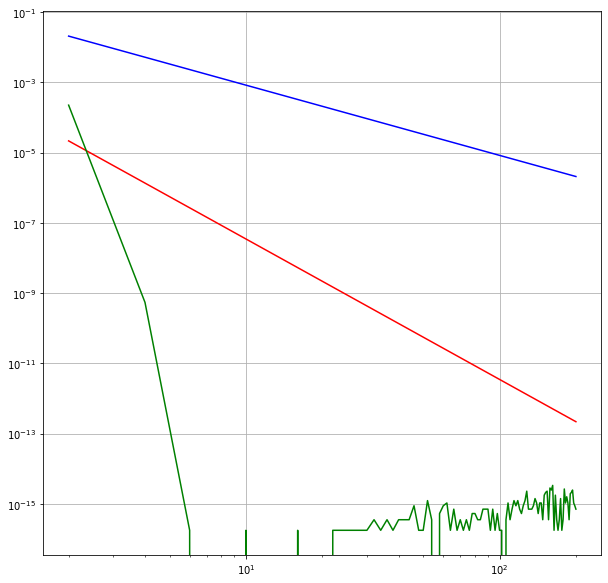

In [ ]:
# Graficacion
plt.figure(figsize=(10,10))
plt.loglog(n,relative_trapz,"b-")
plt.loglog(n,relative_simpson,"r-")
plt.loglog(n,relative_gauss,"g-")
plt.grid()

La grafica nos puestra la regla de la potencia donde $\epsilon \approx CN^\alpha$, de tal manera 
\begin{equation}
log(\epsilon (N)) = \alpha log(N)+B
\end{equation}
 donde $B = log(C)$ y el valor $\alpha$ es la pendiente de la grafica


In [ ]:
logtrapz = np.log10(relative_trapz)
logsimps = np.log10(relative_simpson)  
logn = np.log10(n)
alpha_1 = ((logtrapz[-1]-logtrapz[0])/(logn[-1]-logn[0]))
alpha_2 = ((logsimps[-1]-logsimps[0])/(logn[-1]-logn[0]))
print(alpha_1,alpha_2)

-1.9990987945268675 -3.998142652494453


\begin{align}
\alpha_1= &-1.99909 \quad &\text{Metodo trapezoidal} \\
\alpha_2 =& -3.9981 \quad &\text{Metodo Simpson}
\end{align}

Ahora podemos encontrar $B$ como un promedio de $log(\epsilon (N)) = \alpha log(N)+B$ evaluado en cada $N$

In [ ]:
C_1 = 10**(sum(logtrapz-alpha_1*logn)/len(logn))
C_2 = 10**(sum(logsimps-alpha_2*logn)/len(logn))
print(C_1,C_2)

0.0830031012378819 0.0003444329626712162


\begin{align}
C_1= &0.0830031 \quad &\text{Metodo trapezoidal} \\
C_2 =&0.0003444 \quad &\text{Metodo Simpson}
\end{align}
Las regla de la potencia queda
\begin{align}
&\text{Metodo trapezoidal }= \epsilon \approx 0.0830031N^{-1.99909}\\
&\text{Metodo Simpson }= = \epsilon \approx 0.0003444N^{-3.9981}
\end{align}